In [45]:
##import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick  
import seaborn as sns 
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [46]:
#import scrubbed file for pre-processing
churn_df = pd.read_csv('../data/interim/ready_for_preprocessing_Telco_Customer_Churn.csv')
churn_df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroups
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [47]:
#convert churn to binary numeric value with Yes=1 and No=0 to avoid it being impacted by get_dummies method for categorical object data
churn_df['Churn'] = np.where(churn_df.Churn =='Yes',1,0)
churn_df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroups
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [48]:
#review the data types of the df
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7032 non-null   int64  
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [49]:
#convert all the remaining categorical variables into numeric values using pd.get_dummies method.
churn_converted = pd.get_dummies(churn_df, dtype=int)
churn_converted.head()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureGroups_1 - 12,tenureGroups_13 - 24,tenureGroups_25 - 36,tenureGroups_37 - 48,tenureGroups_49 - 60,tenureGroups_61 - 72,tenureGroups_> 72
0,0,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
2,2,0,2,53.85,108.15,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
3,3,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [50]:
churn_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7032 non-null   int32  
 6   gender_Female                            7032 non-null   int32  
 7   gender_Male                              7032 non-null   int32  
 8   Partner_No                               7032 non-null   int32  
 9   Partner_Yes                              7032 non-null   int32  
 10  Dependents_No                            7032 no

In [51]:
# before scaling any features; I will split into train and test sets to minimize data leakage. 
X = churn_converted.drop(columns=['Churn'])
y = churn_converted['Churn']

print(X.shape, y.shape)
# split the data. I'm using random state = 30 for reproducability
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=30)


(7032, 53) (7032,)


In [52]:
X_train.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureGroups_1 - 12,tenureGroups_13 - 24,tenureGroups_25 - 36,tenureGroups_37 - 48,tenureGroups_49 - 60,tenureGroups_61 - 72,tenureGroups_> 72
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.00000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,...,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,3529.090489,0.164622,32.302222,64.825636,2275.18776,0.493333,0.506667,0.519289,0.480711,0.703822,...,0.216356,0.332267,0.230044,0.295822,0.149511,0.123556,0.104889,0.115733,0.160356,0.050133
std,2025.957819,0.370872,24.565876,30.071033,2265.09988,0.500000,0.500000,0.499672,0.499672,0.456611,...,0.411796,0.471068,0.420898,0.456452,0.356623,0.329103,0.306437,0.319933,0.366968,0.218239
min,1.000000,0.000000,1.000000,18.250000,18.85000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1785.000000,0.000000,9.000000,35.550000,401.50000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3540.000000,0.000000,29.000000,70.500000,1388.45000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5286.000000,0.000000,56.000000,89.850000,3778.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7042.000000,1.000000,72.000000,118.650000,8684.80000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
column_names = X_train.columns
print(column_names)

Index(['Unnamed: 0', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contrac

In [54]:
print(X_train['MonthlyCharges'].head())
MC_mean = X_train['MonthlyCharges'].mean()
MC_std = X_train['MonthlyCharges'].std()
TC_mean = X_train['TotalCharges'].mean()
TC_std = X_train['TotalCharges'].std()

4505    92.45
3720    89.05
6379    20.40
5213    65.50
1941    90.40
Name: MonthlyCharges, dtype: float64


<Figure size 2000x1000 with 0 Axes>

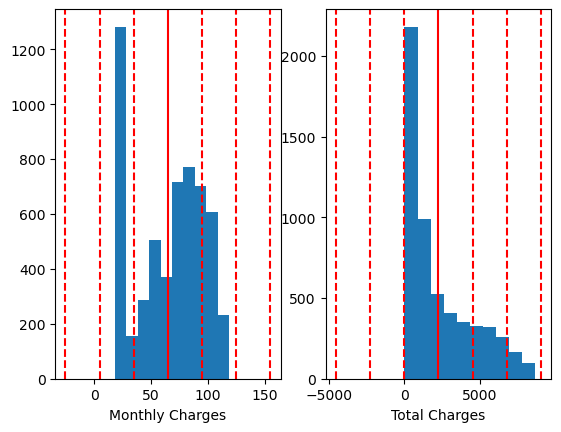

In [55]:
# most of the features in this data set are binary as such
# we will look at MonthlyCharges and TotalCharges in a histogram
#plot histograms for the charges columns to view distribution.

plt.figure(figsize=(20,10))
fig, ax = plt.subplots(1,2)
#plot histogram for MonthlyCharges
ax[0].hist(X_train['MonthlyCharges'], bins=10)
ax[0].set_xlabel("Monthly Charges")
ax[0].axvline(MC_mean, color='r')
ax[0].axvline(MC_mean + MC_std, color='r', linestyle='--')
ax[0].axvline(MC_mean + MC_std*2, color='r', linestyle='--')
ax[0].axvline(MC_mean + MC_std*3, color='r', linestyle='--')
ax[0].axvline(MC_mean - MC_std, color='r', linestyle='--')
ax[0].axvline(MC_mean - MC_std*2, color='r', linestyle='--')
ax[0].axvline(MC_mean -  MC_std*3, color='r', linestyle='--')
ax[1].hist(X_train['TotalCharges'], bins=10)
ax[1].set_xlabel("Total Charges")
ax[1].axvline(TC_mean, color='r')
ax[1].axvline(TC_mean + TC_std, color='r', linestyle='--')
ax[1].axvline(TC_mean + TC_std*2, color='r', linestyle='--')
ax[1].axvline(TC_mean + TC_std*3, color='r', linestyle='--')
ax[1].axvline(TC_mean - TC_std, color='r', linestyle='--')
ax[1].axvline(TC_mean - TC_std*2, color='r', linestyle='--')
ax[1].axvline(TC_mean -  TC_std*3, color='r', linestyle='--')
plt.show()

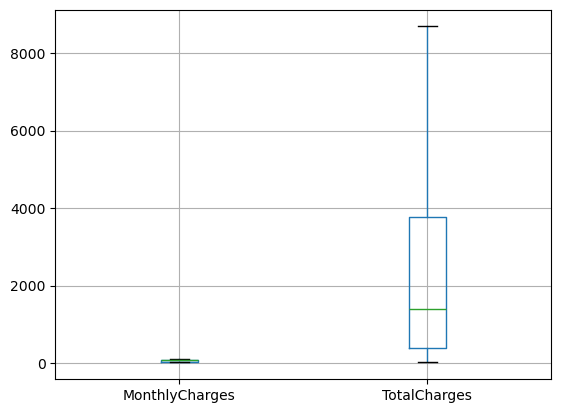

In [56]:
#create boxplots to see if there are potential outliers
X_train[['MonthlyCharges','TotalCharges']].boxplot()
plt.show()

#### All other features are binary, therefore we will use the standard scaler to transform all features as the charges show huge magnitude differences to one another and the binary features.



In [57]:
#instantiate the standard scaler
scaler = StandardScaler()
#fit and transform the monthly charges
X_train_scaled = scaler.fit_transform(X_train)

#convert X_train array back into a dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = column_names)

#transform test data
X_test_scaled = scaler.transform(X_test)
#convert X_test array back into a dataframe
X_test_scaled = pd.DataFrame(X_test_scaled, columns = column_names)

# view train dataframe
X_train_scaled.describe().round(3)


,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureGroups_1 - 12,tenureGroups_13 - 24,tenureGroups_25 - 36,tenureGroups_37 - 48,tenureGroups_49 - 60,tenureGroups_61 - 72,tenureGroups_> 72
count,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,...,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000,5625.000
mean,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,...,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.742,-0.444,-1.274,-1.549,-0.996,-0.987,-1.013,-1.039,-0.962,-1.542,...,-0.525,-0.705,-0.547,-0.648,-0.419,-0.375,-0.342,-0.362,-0.437,-0.230
25%,-0.861,-0.444,-0.949,-0.974,-0.827,-0.987,-1.013,-1.039,-0.962,-1.542,...,-0.525,-0.705,-0.547,-0.648,-0.419,-0.375,-0.342,-0.362,-0.437,-0.230
50%,0.005,-0.444,-0.134,0.189,-0.392,-0.987,0.987,0.962,-0.962,0.649,...,-0.525,-0.705,-0.547,-0.648,-0.419,-0.375,-0.342,-0.362,-0.437,-0.230
75%,0.867,-0.444,0.965,0.832,0.664,1.013,0.987,0.962,1.039,0.649,...,-0.525,1.418,-0.547,1.543,-0.419,-0.375,-0.342,-0.362,-0.437,-0.230
max,1.734,2.253,1.616,1.790,2.830,1.013,0.987,0.962,1.039,0.649,...,1.903,1.418,1.829,1.543,2.385,2.663,2.921,2.764,2.288,4.353


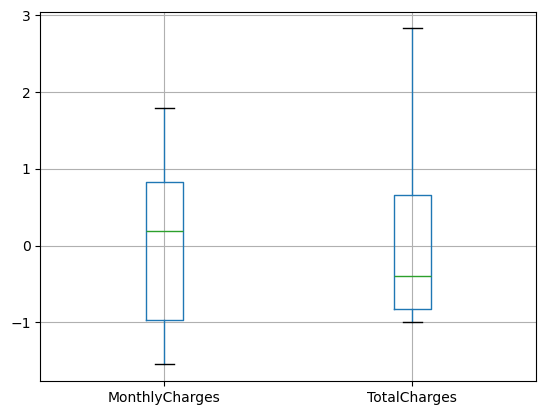

In [58]:
#create boxplots to see if there are potential outliers
X_train_scaled[['MonthlyCharges','TotalCharges']].boxplot()
plt.show()